In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [108]:
tcs = pd.read_csv("./TCS_full.csv")
tcs.shape

(5301, 7)

In [109]:
# Check the date range of the dataset
earliest_date = tcs['Date'].min()
latest_date = tcs['Date'].max()

earliest_date, latest_date

('2002-08-12', '2023-12-01')

<h2> Import transformation Module

In [110]:
from tcs import transform_stock_data
X_transformed = transform_stock_data(tcs)

<h3> Train and Test data Preparation

In [111]:
# Shift the 'Close' column to create the target variable for next day prediction
y_data = X_transformed['Close'].shift(-1)

# Remove the last row from X_transformed as its corresponding target is NaN after shifting
X_data = X_transformed.iloc[:-1, :]

# Drop the 'Close' column from X_train as it's now the target variable
X_data = X_data.drop('Close', axis=1)

# Also, drop the first row from y_train to align with X_train
y_data = y_data.iloc[:-1]

# Check the first few rows of X_train and y_train
print(X_data.shape)
print(y_data.shape)

(4834, 4)
(4834,)


In [112]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit the scaler to the X_train data and transform it
X_data = scaler.fit_transform(X_data)

X_data

array([[6.59557573e-01, 4.81408439e-01, 4.06256431e-02, 8.20649423e-04],
       [6.13351667e-01, 4.80853402e-01, 3.94958430e-02, 8.36869072e-04],
       [5.64204458e-01, 4.80381707e-01, 3.94958430e-02, 8.60133664e-04],
       ...,
       [5.90607026e-01, 5.20404811e-01, 8.94147046e-01, 8.85906641e-01],
       [6.50374831e-01, 5.32692432e-01, 8.95996125e-01, 8.87678680e-01],
       [5.96233855e-01, 5.33794177e-01, 8.91806762e-01, 8.89236424e-01]])

In [113]:
# Calculate the number of rows for the split
total_rows = len(X_data)
split_point = int(total_rows * 0.7)

# Split the data into training and testing sets
X_train = X_data[:split_point]
X_test = X_data[split_point:]

y_train = y_data[:split_point]
y_test = y_data[split_point:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3383, 4), (1451, 4), (3383,), (1451,))

# Support Vector Machines

In [114]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the SVR model
svr_model = SVR(kernel='rbf', C=1.0, gamma='scale')

# Train the model
svr_model.fit(X_train, y_train)

# Predict on the Train set
y_train_pred_svr = svr_model.predict(X_train)

# Calculate MSE and R^2 Score for the train set
mse_train_svr = mean_squared_error(y_train, y_train_pred_svr)
r2_train_svr = r2_score(y_train, y_train_pred_svr)

In [115]:
print("SVR - Train Data - Mean Squared Error:", mse_train_svr)
print("SVR - Train Data - R^2 Score:", r2_train_svr)

SVR - Train Data - Mean Squared Error: 20605.609031433956
SVR - Train Data - R^2 Score: 0.8960794496749841


In [116]:
# Predict on the scaled test data
y_test_pred_optimized = svr_model.predict(X_test)

# Calculate MSE and R^2 Score for the test data
mse_test_optimized = mean_squared_error(y_test, y_test_pred_optimized)
r2_test_optimized = r2_score(y_test, y_test_pred_optimized)

print("Optimized SVR - Test Data - Mean Squared Error:", mse_test_optimized)
print("Optimized SVR - Test Data - R^2 Score:", r2_test_optimized)

Optimized SVR - Test Data - Mean Squared Error: 4450028.033492736
Optimized SVR - Test Data - R^2 Score: -7.892087372537157


# Hyperparameter Tuning

We manually tried some for parameters near the optimised parameter from grid search and further the loss was reduced

Best parameter : C=500, gamma=0.175, kernel='rbf'

In [117]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the SVR model with the best parameters
optimized_svr_model = SVR(C=500, gamma=0.175, kernel='rbf')

# Train the model on the scaled training data
optimized_svr_model.fit(X_train, y_train)

# Predict on the scaled train data
y_train_pred_optimized = optimized_svr_model.predict(X_train)

# Calculate MSE and R^2 Score for the test data
mse_train_optimized = mean_squared_error(y_train, y_train_pred_optimized)
r2_train_optimized = r2_score(y_train, y_train_pred_optimized)

print("Optimized SVR - train Data - Mean Squared Error:", mse_train_optimized)
print("Optimized SVR - train Data - R^2 Score:", r2_train_optimized)


Optimized SVR - train Data - Mean Squared Error: 284.5685551465361
Optimized SVR - train Data - R^2 Score: 0.9985648315072411


In [118]:
# Predict on the scaled test data
y_test_pred_optimized = optimized_svr_model.predict(X_test)

# Calculate MSE and R^2 Score for the test data
mse_test_optimized = mean_squared_error(y_test, y_test_pred_optimized)
r2_test_optimized = r2_score(y_test, y_test_pred_optimized)

print("Optimized SVR - Test Data - Mean Squared Error:", mse_test_optimized)
print("Optimized SVR - Test Data - R^2 Score:", r2_test_optimized)

Optimized SVR - Test Data - Mean Squared Error: 48379.75058642185
Optimized SVR - Test Data - R^2 Score: 0.9033271327645174


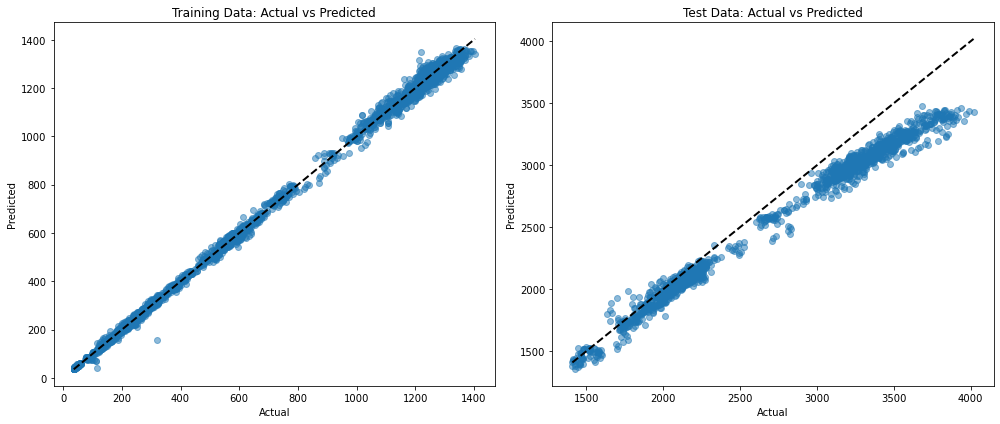

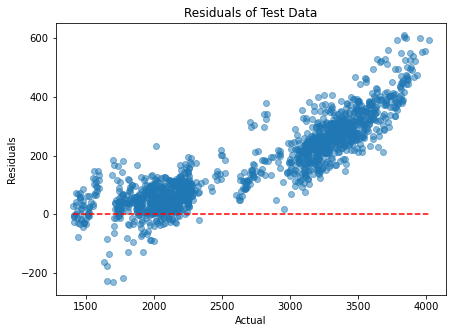

In [119]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(14, 6))

# Scatter plot for training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_optimized, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Scatter plot for test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_optimized, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

# Residual plot for test data
plt.figure(figsize=(7, 5))
residuals_test = y_test - y_test_pred_optimized
plt.scatter(y_test, residuals_test, alpha=0.5)
plt.hlines(0, y_test.min(), y_test.max(), colors='red', linestyles='--')
plt.title('Residuals of Test Data')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.show()


<h2>Observations:</h2>

1. Optimized SVR - Test Data - Mean Squared Error: 48379.75058642185
2. Optimized SVR - Test Data - R^2 Score: 0.9033271327645174
3. SVR with hyperparameter tuning is way better than Random forest Regressor and Linear model.
4. Mean Squared Error for random forest was 1049489.775857245 as compared to SVC 48379.75058642185
5. We will try and further optimise our predictions.


# Deep Learning Module

In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [127]:
# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer and first hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
85/85 [==============================] - 0s 5ms/step - loss: 70617.0625 - val_loss: 6577.8677
Epoch 2/50
85/85 [==============================] - 0s 3ms/step - loss: 1354.9955 - val_loss: 5967.8354
Epoch 3/50
85/85 [==============================] - 0s 3ms/step - loss: 843.9464 - val_loss: 4396.3232
Epoch 4/50
85/85 [==============================] - 0s 3ms/step - loss: 826.4556 - val_loss: 9482.4004
Epoch 5/50
85/85 [==============================] - 0s 3ms/step - loss: 732.6700 - val_loss: 3900.5376
Epoch 6/50
85/85 [==============================] - 0s 3ms/step - loss: 617.5843 - val_loss: 2360.5132
Epoch 7/50
85/85 [==============================] - 0s 4ms/step - loss: 510.6209 - val_loss: 2384.5793
Epoch 8/50
85/85 [==============================] - 0s 3ms/step - loss: 483.0494 - val_loss: 2376.7307
Epoch 9/50
85/85 [==============================] - 0s 3ms/step - loss: 488.0097 - val_loss: 3344.6326
Epoch 10/50
85/85 [==============================] - 0s 3ms/step - los

In [128]:
# Evaluate the model on train data
y_train_pred_nn = model.predict(X_train)
mse_train_nn = mean_squared_error(y_train, y_train_pred_nn)
r2_train_nn = r2_score(y_train, y_train_pred_nn)

print("Neural Network - Train Data - Mean Squared Error:", mse_train_nn)
print("Neural Network - train Data - R^2 Score:", r2_train_nn)

Neural Network - Train Data - Mean Squared Error: 335.8413949962689
Neural Network - train Data - R^2 Score: 0.9983062464915892


In [129]:
# Evaluate the model on test data
y_test_pred_nn = model.predict(X_test)
mse_test_nn = mean_squared_error(y_test, y_test_pred_nn)
r2_test_nn = r2_score(y_test, y_test_pred_nn)

print("Neural Network - Test Data - Mean Squared Error:", mse_test_nn)
print("Neural Network - Test Data - R^2 Score:", r2_test_nn)

Neural Network - Test Data - Mean Squared Error: 5757.0062566369115
Neural Network - Test Data - R^2 Score: 0.9884962965956691


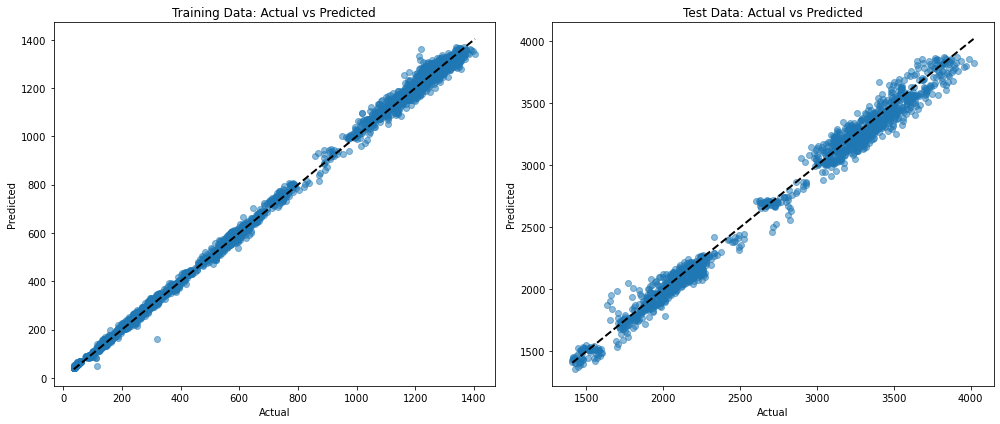

In [102]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(14, 6))

# Scatter plot for training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_nn, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Scatter plot for test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_nn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

# Residual plot for test data
# plt.figure(figsize=(7, 5))
# residuals_test = y_test - y_test_pred_nn
# plt.scatter(y_test, residuals_test, alpha=0.5)
# plt.hlines(0, y_test.min(), y_test.max(), colors='red', linestyles='--')
# plt.title('Residuals of Test Data')
# plt.xlabel('Actual')
# plt.ylabel('Residuals')
# plt.show()


<h2> Observation:</h2>

1. A simple Neural Network performed even better than the Optimized SVR 
2. The Mean square error is reduced by almost 1/10

<h3> Results</h3>

1. Neural Network - Test Data - Mean Squared Error: 5757.0062566369115
2. Neural Network - Test Data - R^2 Score: 0.988496296595669